In [1]:
import random

# Définition des tables de probabilités pour le 1er choix par période
# Les "participants" sont ici représentés par leur "Seed" (rang d'entrée)
# La valeur est la probabilité de gagner le 1er choix

PROBABILITES_LOTERIE = {
    "1990-1993": [
        (1, 11/66), (2, 10/66), (3, 9/66), (4, 8/66), (5, 7/66),
        (6, 6/66), (7, 5/66), (8, 4/66), (9, 3/66), (10, 2/66),
        (11, 1/66) # 11 équipes dans la loterie typiquement
    ],
    "1994-2018": [
        (1, 250/1000), (2, 199/1000), (3, 156/1000), (4, 119/1000),
        (5, 88/1000), (6, 63/1000), (7, 43/1000), (8, 28/1000),
        (9, 17/1000), (10, 11/1000), (11, 8/1000), (12, 7/1000),
        (13, 6/1000),
        # (14, 5/1000) # La 14ème équipe a été ajoutée plus tard dans cette période avec l'expansion
                      # Pour simplifier, on peut s'arrêter à 13 ou ajouter une condition
                      # Si l'année est >= X, alors on inclut le 14e seed.
                      # Pour l'instant, je vais supposer 13, mais c'est un point à affiner
                      # si vous avez des années spécifiques où 14 équipes participaient
                      # avec ce système (ex: après l'arrivée des Bobcats/Hornets)
    ],
    "2019-present": [ # Basé sur votre image
        (1, 0.1400), (2, 0.1400), (3, 0.1400), (4, 0.1250),
        (5, 0.1050), (6, 0.0900), (7, 0.0750), (8, 0.0600),
        (9, 0.0450), (10, 0.0300), (11, 0.0200), (12, 0.0150),
        (13, 0.0100), (14, 0.0050)
    ]
}

# Ajustement pour la période 1994-2018 si plus de 13 équipes
# Par exemple, à partir de la loterie 2005 (après l'arrivée des Bobcats)
PROBABILITES_LOTERIE_1994_2018_14_TEAMS = PROBABILITES_LOTERIE["1994-2018"] + [(14, 5/1000)]


In [2]:


def simuler_probabilite_gagnant_loterie(annee: int) -> float:
    """
    Simule une loterie de draft NBA pour une année donnée et retourne
    la probabilité de victoire initiale du "seed" qui a été tiré au sort.

    Args:
        annee: L'année de la loterie.

    Returns:
        La probabilité qu'avait le seed gagnant (simulé) de remporter le 1er choix.
        
    Raises:
        ValueError: Si l'année n'est pas couverte par les systèmes de loterie connus.
    """
    participants_avec_probabilites = []

    if 1990 <= annee <= 1993:
        participants_avec_probabilites = PROBABILITES_LOTERIE["1990-1993"]
    elif 1994 <= annee <= 2004: # Avant l'expansion à 30 équipes (arrivée des Bobcats)
        participants_avec_probabilites = PROBABILITES_LOTERIE["1994-2018"][:13] # S'assurer de prendre les 13
    elif 2005 <= annee <= 2018: # Après l'expansion à 30 équipes
        participants_avec_probabilites = PROBABILITES_LOTERIE_1994_2018_14_TEAMS
    elif annee >= 2019:
        participants_avec_probabilites = PROBABILITES_LOTERIE["2019-present"]
    else:
        raise ValueError(f"L'année {annee} n'est pas couverte par les systèmes de loterie implémentés.")

    # Séparer les seeds (participants) et leurs probabilités
    seeds = [item[0] for item in participants_avec_probabilites]
    probabilites = [item[1] for item in participants_avec_probabilites]

    # S'assurer que la somme des probabilités est proche de 1 (gestion des erreurs de flottants)
    if not (0.99 < sum(probabilites) < 1.01) and not (annee >= 1990 and annee <= 1993 and abs(sum(probabilites) - 66/66) < 0.001 ): # 66/66=1
        print(f"Attention: La somme des probabilités pour l'année {annee} est {sum(probabilites)}, ce qui n'est pas proche de 1.")
        # Vous pourriez lever une erreur ici si c'est critique
        # raise ValueError(f"La somme des probabilités pour l'année {annee} n'est pas 1.")

    # Tirer au sort un seed gagnant en fonction de ses probabilités
    # random.choices retourne une liste, donc on prend le premier (et unique) élément
    gagnant_seed_simule = random.choices(seeds, weights=probabilites, k=1)[0]

    # Retrouver la probabilité initiale de ce seed gagnant
    probabilite_du_gagnant = 0.0
    for seed, prob in participants_avec_probabilites:
        if seed == gagnant_seed_simule:
            probabilite_du_gagnant = prob
            break
    
    return probabilite_du_gagnant


In [3]:

# --- Exemple d'utilisation ---
print("Simulation pour différentes années (probabilité du gagnant simulé) :")

# Test pour la période 1990-1993
annee_test = 1992
prob_gagnant = simuler_probabilite_gagnant_loterie(annee_test)
print(f"Année {annee_test}: Probabilité du gagnant simulé = {prob_gagnant:.4f}")
# On s'attend à voir une des probas de cette période (ex: 0.1667, 0.1515, ..., 0.0152)

# Test pour la période 1994-2004 (13 équipes)
annee_test = 2000
prob_gagnant = simuler_probabilite_gagnant_loterie(annee_test)
print(f"Année {annee_test}: Probabilité du gagnant simulé = {prob_gagnant:.4f}")
 # On s'attend à voir une des probas de cette période (ex: 0.2500, 0.1990, ..., 0.0060)

# Test pour la période 2005-2018 (14 équipes)
annee_test = 2010
prob_gagnant = simuler_probabilite_gagnant_loterie(annee_test)
print(f"Année {annee_test}: Probabilité du gagnant simulé = {prob_gagnant:.4f}")
 # On s'attend à voir une des probas de cette période (ex: 0.2500, ..., 0.0050)

# Test pour la période 2019-présent
annee_test = 2023
prob_gagnant = simuler_probabilite_gagnant_loterie(annee_test)
print(f"Année {annee_test}: Probabilité du gagnant simulé = {prob_gagnant:.4f}")
# On s'attend à voir une des probas de cette période (ex: 0.1400, 0.1250, ..., 0.0050)

print("\nExécution de 10 simulations pour l'année 2023 pour voir la variabilité:")
for i in range(10):
    prob_gagnant = simuler_probabilite_gagnant_loterie(2023)
    print(f"  Sim {i+1}: {prob_gagnant:.4f}")
# # Test pour une année non couverte
try:
    simuler_probabilite_gagnant_loterie(1980)
except ValueError as e:
    print(f"\nErreur attendue: {e}")

Simulation pour différentes années (probabilité du gagnant simulé) :
Année 1992: Probabilité du gagnant simulé = 0.1364
Année 2000: Probabilité du gagnant simulé = 0.2500
Année 2010: Probabilité du gagnant simulé = 0.2500
Année 2023: Probabilité du gagnant simulé = 0.1400

Exécution de 10 simulations pour l'année 2023 pour voir la variabilité:
  Sim 1: 0.0600
  Sim 2: 0.1250
  Sim 3: 0.1400
  Sim 4: 0.0450
  Sim 5: 0.1400
  Sim 6: 0.1400
  Sim 7: 0.1400
  Sim 8: 0.1250
  Sim 9: 0.1250
  Sim 10: 0.1250

Erreur attendue: L'année 1980 n'est pas couverte par les systèmes de loterie implémentés.


In [4]:
def simuler_probabilite_sequence_loterie(annees_etude: list[int]) -> float:
    """
    Simule une séquence de loteries pour les années données et calcule
    la probabilité de cette séquence spécifique de gagnants simulés.

    Args:
        annees_etude: Une liste d'entiers représentant les années à simuler.
                      Par exemple, list(range(1990, 2024)) pour la période 1990-2023.

    Returns:
        La probabilité de la séquence de gagnants simulés (produit des probabilités individuelles).
    """
    if not annees_etude:
        return 1.0 # Une séquence vide a une probabilité de 1 (élément neutre pour la multiplication)

    probabilite_sequence = 1.0
    for annee in annees_etude:
        prob_gagnant_annee = simuler_probabilite_gagnant_loterie(annee)
        probabilite_sequence *= prob_gagnant_annee
        # Pour éviter les underflows avec de très petites probabilités sur de longues séquences:
        if probabilite_sequence == 0.0:
            break # Si la probabilité devient 0, le produit restera 0
            
    return probabilite_sequence

In [5]:
print("\n--- Test de la simulation de séquence ---")

# Définir la période d'étude
# Par exemple, de 1990 à 2023 inclus (la loterie de 2023 concerne la draft de 2023)
annees_etude_exemple = list(range(1990, 2024)) 
print(f"Période d'étude: {min(annees_etude_exemple)} - {max(annees_etude_exemple)} ({len(annees_etude_exemple)} années)")

# Simuler une seule séquence et afficher sa probabilité
prob_sequence_simulee_1 = simuler_probabilite_sequence_loterie(annees_etude_exemple)
print(f"Probabilité d'UNE séquence simulée sur la période: {prob_sequence_simulee_1:.10e}") # Affichage en notation scientifique

# Pour obtenir une distribution de ces probabilités de séquence, vous feriez :
nombre_simulations_sequence = 10000 # Par exemple
resultats_probabilites_sequences = []
print(f"\nSimulation de {nombre_simulations_sequence} séquences complètes (cela peut prendre un moment)...")
for i in range(nombre_simulations_sequence):
    prob_seq = simuler_probabilite_sequence_loterie(annees_etude_exemple)
    resultats_probabilites_sequences.append(prob_seq)
    if (i + 1) % 1000 == 0:
        print(f"  Simulation de séquence {i+1}/{nombre_simulations_sequence} terminée.")

print(f"\nDistribution des probabilités de {nombre_simulations_sequence} séquences simulées (premiers 10):")
for i in range(min(10, len(resultats_probabilites_sequences))):
    print(f"  {resultats_probabilites_sequences[i]:.10e}")
    
# À ce stade, vous auriez votre 'resultats_probabilites_sequences' (la distribution de référence)
# et vous la compareriez à la probabilité de votre séquence observée (réelle).
# Par exemple, si votre probabilité de séquence observée est P_obs:
# p_value = sum(1 for p_sim in resultats_probabilites_sequences if p_sim <= P_obs) / nombre_simulations_sequence
# print(f"P-valeur (approximative) si P_observée était X : {p_value}")


--- Test de la simulation de séquence ---
Période d'étude: 1990 - 2023 (34 années)
Probabilité d'UNE séquence simulée sur la période: 2.2792245837e-31

Simulation de 10000 séquences complètes (cela peut prendre un moment)...
  Simulation de séquence 1000/10000 terminée.
  Simulation de séquence 2000/10000 terminée.
  Simulation de séquence 3000/10000 terminée.
  Simulation de séquence 4000/10000 terminée.
  Simulation de séquence 5000/10000 terminée.
  Simulation de séquence 6000/10000 terminée.
  Simulation de séquence 7000/10000 terminée.
  Simulation de séquence 8000/10000 terminée.
  Simulation de séquence 9000/10000 terminée.
  Simulation de séquence 10000/10000 terminée.

Distribution des probabilités de 10000 séquences simulées (premiers 10):
  5.2205475585e-31
  2.8809913573e-34
  1.9562888633e-30
  2.7126826927e-33
  4.2437637667e-32
  2.0188303822e-30
  1.0401782988e-32
  2.5656315534e-33
  4.3187558508e-35
  1.6878367530e-30


Extrait des données réelles chargées :
   year     name  seed    prob
0  1990     Nets     1  0.1667
1  1991  Hornets     5  0.1061
2  1992    Magic     2  0.1515
3  1993    Magic    11  0.0152
4  1994    Bucks     2  0.1630

Probabilité de la séquence observée (P_observee): 1.1388854045e-34

Simulation de 100000 séquences pour la distribution de référence...
  10000/100000 simulations de séquences terminées.
  20000/100000 simulations de séquences terminées.
  30000/100000 simulations de séquences terminées.
  40000/100000 simulations de séquences terminées.
  50000/100000 simulations de séquences terminées.
  60000/100000 simulations de séquences terminées.
  70000/100000 simulations de séquences terminées.
  80000/100000 simulations de séquences terminées.
  90000/100000 simulations de séquences terminées.
  100000/100000 simulations de séquences terminées.


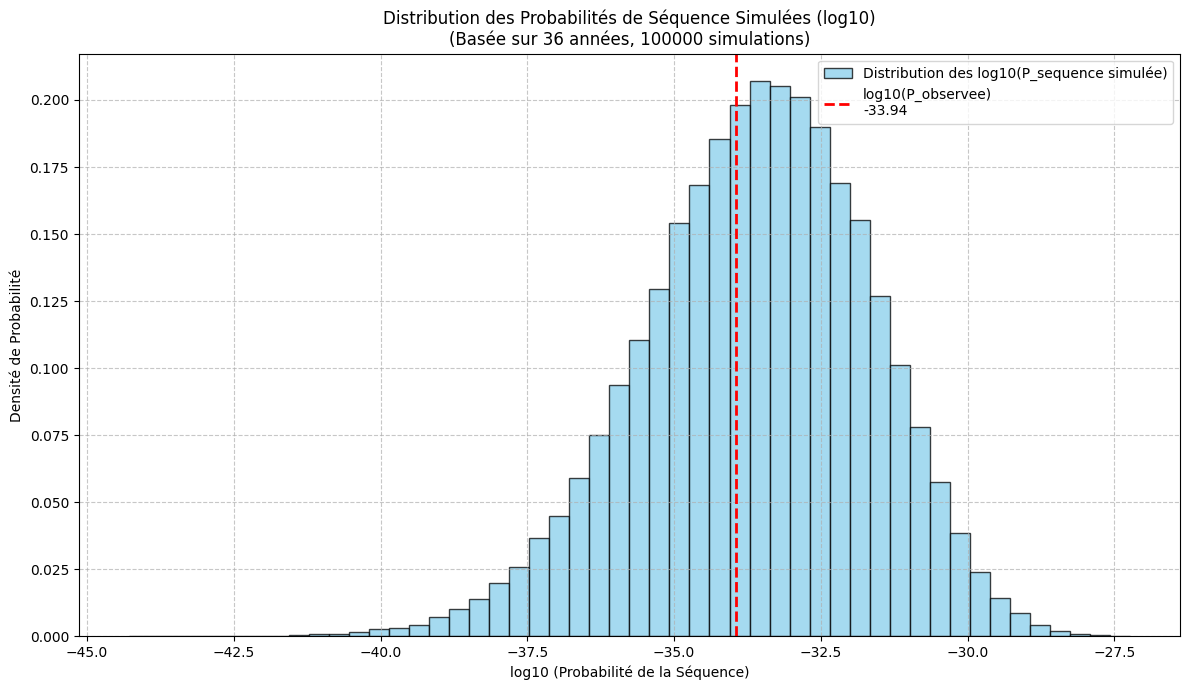


Nombre de séquences simulées: 100000
Nombre de séquences simulées avec probabilité <= P_observee: 41359
P-valeur estimée: 0.413590
La p-valeur n'est pas inférieure à 0.05. Il n'y a pas de preuve statistique forte pour rejeter l'hypothèse nulle sur la base de ce test.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

# 1. Lire les données réelles depuis le fichier Excel
path = "data.xlsx"
options = [',', None]  # ',' puis point par défaut

for dec in options:
    try:
        # Lecture avec le séparateur decimal actuel
        df = pd.read_excel(path, decimal=dec)
        # Conversion unifiée de la colonne 'prob' en float
        df['prob'] = pd.to_numeric(
            df['prob'].astype(str).str.replace(',', '.'),
            errors='raise'
        )
        break  # succès : on sort de la boucle
    except Exception as e:
        print(f"Lecture avec decimal={dec!r} échouée : {e}")
else:
    print(f"Erreur : impossible de charger '{path}' avec une colonne 'prob' numérique.")
    sys.exit(1)

# À ce stade, df contient vos données prêtes à l'emploi
real_data_df = df
        
print("Extrait des données réelles chargées :")
print(real_data_df.head())

annees_reelles = real_data_df['year'].tolist()
probabilites_reelles_gagnants = real_data_df['prob'].tolist()

# 2. Calculer la probabilité de la séquence observée (P_observee)
P_observee = 1.0
for prob_reelle in probabilites_reelles_gagnants:
    P_observee *= prob_reelle
    if P_observee == 0.0: # Gestion de l'underflow
        break
print(f"\nProbabilité de la séquence observée (P_observee): {P_observee:.10e}")

# 3. Générer un grand nombre de séquences simulées
nombre_simulations_pour_distribution = 100000 # Augmenté pour une meilleure distribution
resultats_probabilites_sequences_simulees = []

print(f"\nSimulation de {nombre_simulations_pour_distribution} séquences pour la distribution de référence...")
for i in range(nombre_simulations_pour_distribution):
    prob_seq_sim = simuler_probabilite_sequence_loterie(annees_reelles)
    resultats_probabilites_sequences_simulees.append(prob_seq_sim)
    if (i + 1) % (nombre_simulations_pour_distribution // 10) == 0:
        print(f"  {i+1}/{nombre_simulations_pour_distribution} simulations de séquences terminées.")

# --- Traitement pour le graphique : Utilisation du log10 des probabilités ---
# Les probabilités de séquence sont très petites, le log10 aide à visualiser
log_P_observee = np.log10(P_observee) if P_observee > 0 else -np.inf
log_resultats_simules = []
for p_sim in resultats_probabilites_sequences_simulees:
    if p_sim > 0:
        log_resultats_simules.append(np.log10(p_sim))
    # else: on pourrait ajouter -np.inf mais l'histogramme les ignorera

# 4. & 5. Représenter la distribution et placer P_observee
plt.figure(figsize=(12, 7))
plt.hist(log_resultats_simules, bins=50, alpha=0.75, label="Distribution des log10(P_sequence simulée)", density=True, color='skyblue', edgecolor='black')
plt.axvline(log_P_observee, color='red', linestyle='dashed', linewidth=2, label=f"log10(P_observee)\n{log_P_observee:.2f}")

plt.title(f"Distribution des Probabilités de Séquence Simulées (log10)\n(Basée sur {len(annees_reelles)} années, {nombre_simulations_pour_distribution} simulations)")
plt.xlabel("log10 (Probabilité de la Séquence)")
plt.ylabel("Densité de Probabilité")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Calculer la p-valeur
# La p-valeur est la proportion de simulations où la probabilité de séquence simulée
# est inférieure ou égale à la probabilité de la séquence observée.
compteur_inferieur_ou_egal = 0
for p_sim_val in resultats_probabilites_sequences_simulees:
    if p_sim_val <= P_observee:
        compteur_inferieur_ou_egal += 1

if nombre_simulations_pour_distribution > 0:
    p_valeur = compteur_inferieur_ou_egal / nombre_simulations_pour_distribution
else:
    p_valeur = float('nan') # Éviter la division par zéro

print(f"\nNombre de séquences simulées: {nombre_simulations_pour_distribution}")
print(f"Nombre de séquences simulées avec probabilité <= P_observee: {compteur_inferieur_ou_egal}")
print(f"P-valeur estimée: {p_valeur:.6f}")

if p_valeur < 0.05:
    print("La p-valeur est inférieure à 0.05. Cela suggère que la séquence observée est statistiquement peu probable sous l'hypothèse nulle (loterie équitable).")
else:
    print("La p-valeur n'est pas inférieure à 0.05. Il n'y a pas de preuve statistique forte pour rejeter l'hypothèse nulle sur la base de ce test.")